In [29]:
import numpy as np
from numpy import linalg as LA
from scipy.optimize import root
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import csv
import pandas as pd
from scipy.stats import norm

# define matplotlib style
mpl.style.use("classic")
mpl.rc("xtick", labelsize=15)
mpl.rc("ytick", labelsize=15)
mpl.rc("xtick.major", size=14, width=2)
mpl.rc("xtick.minor", size=7, width=2, visible=True)
mpl.rc("ytick.major", size=14, width=2)
mpl.rc("ytick.minor", size=7, width=2, visible=True)
mpl.rc("lines", linewidth=2, markersize=5)
mpl.rc("axes", linewidth=2, labelsize=15, labelpad=2.5)
mpl.rc("legend", fontsize=15, loc="best", frameon=True, numpoints=1)

mpl.rc("font", family="STIXGeneral")
mpl.rc("mathtext", fontset="stix")
mpl.rc("axes", titlesize=20, titlepad=10)

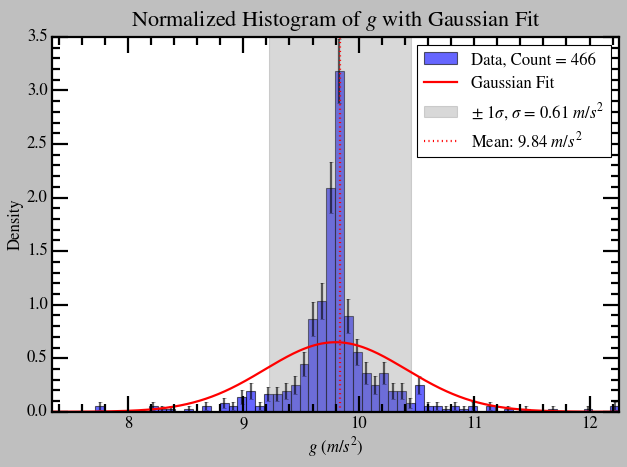

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

def plot_histogram_with_fit(data, x_label, y_label, title, png, num_of_bins=100):
    """
    Plot a normalized histogram of the provided data with Poisson error bars,
    a Gaussian fit (using the median and std) and text annotations.
    
    The histogram is normalized so that the total area is 1.
    
    Parameters:
        data (array-like): Data to be plotted (e.g. a column from a DataFrame).
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        png (str): Filename (without extension) to save the image.
        num_of_bins (int): Number of bins in the histogram.
    """
    gg = np.array(data)
    mean_g = np.mean(gg)
    median_g = np.median(gg)
    std_g = np.std(gg)
    min_g = median_g - 4 * std_g
    max_g = median_g + 4 * std_g
    
    # Compute raw histogram for error calculation and normalized histogram for plotting
    counts_raw, bins = np.histogram(gg, bins=num_of_bins)
    bin_width = bins[1] - bins[0]
    total = gg.shape[0]
    # Normalize counts: density = count / (total * bin_width)
    counts_density = counts_raw / (total * bin_width)
    # Compute Poisson errors on counts and scale to density
    errors_density = np.sqrt(counts_raw) / (total * bin_width)
    
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Plot normalized histogram (area = 1)
    plt.hist(gg, bins=num_of_bins, alpha=0.6, density=True, label=f"Data, Count = {gg.shape[0]}")
    plt.errorbar(bin_centers, counts_density, yerr=errors_density, fmt='none', 
                 ecolor='black', alpha=0.6, capsize=2)
    
    
    # Create x values and compute Gaussian pdf (which is naturally normalized)
    x = np.linspace(min_g, max_g, 1000)
    gaussian_pdf = norm.pdf(x, loc=median_g, scale=std_g)
    plt.plot(x, gaussian_pdf, color="red", label="Gaussian Fit")

    # Plot std region (mean ± std) and a red dotted line at the mean
    plt.axvspan(mean_g - std_g, mean_g + std_g, color='gray', alpha=0.3, label=rf"± 1$\sigma$, $\sigma$ = {round(std_g, 2)} $m/s^2$")
    plt.axvline(mean_g, color='red', linestyle='dotted', lw=2, label=f"Mean: {round(mean_g, 2)} $m/s^2$")
    
    # Axis labels, title, and text annotations
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlim(min_g, max_g)
    
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{png}.png", dpi=300)
    plt.show()

# Example usage:
if __name__ == "__main__":
    df = pd.read_csv("PendulumData.csv")
    data = df["g (m/s2)"][(df["g (m/s2)"] < 15) & (df["g (m/s2)"] > 5)]
    plot_histogram_with_fit(data, r"$g$ ($m/s^2$)", "Density", "Normalized Histogram of $g$ with Gaussian Fit", "PendulumDataHistogram")